In [1]:
import pandas as pd
df_500 = pd.read_csv("cs-500.csv")
df_500.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,target
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,was_not_in_trouble
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,was_in_trouble
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,was_in_trouble
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,was_in_trouble
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,was_in_trouble


In [2]:
df_1000 = pd.read_csv("cs-1000.csv")
df_5000 = pd.read_csv("cs-5000.csv")
df_1000 = pd.read_csv("cs-10000.csv")
df_5000 = pd.read_csv("cs-5000.csv")
df_10000 = pd.read_csv("cs-10000.csv")
df_50000 = pd.read_csv("cs-50000.csv")
df_100000 = pd.read_csv("cs-100000.csv")
df_140000 = pd.read_csv("cs-140000.csv")

label_col = 'target'

x_500 = df_500.drop(columns=[label_col])
y_500 = df_500[label_col]

x_1000 = df_1000.drop(columns=[label_col])
y_1000 = df_1000[label_col]

x_5000 = df_5000.drop(columns=[label_col])
y_5000 = df_5000[label_col]

x_10000 = df_10000.drop(columns=[label_col])
y_10000 = df_10000[label_col]

x_50000 = df_50000.drop(columns=[label_col])
y_50000 = df_50000[label_col]

x_100000 = df_100000.drop(columns=[label_col])
y_100000 = df_100000[label_col]

x_140000 = df_140000.drop(columns=[label_col])
y_140000 = df_140000[label_col]

In [1]:
def benchmark_time(learning_rate, power_t, epochs, alpha, eta0, x_i, y_i, x_val):
    time_taken = 0

    for _ in range(5):
        # training the model
        start_time = time()

        model = SGDClassifier(
            loss='hinge',
            penalty='l2',
            alpha=alpha,
            power_t=power_t,
            learning_rate=learning_rate,
            max_iter=epochs,
            eta0=eta0,
            shuffle=True,
            fit_intercept=True
                                     )

        # fit the dataset into the model
        model.fit(x_i, y_i)

        # use the model to predict the data
        _ = model.predict(x_val)

        end_time = time()
        time_taken += (end_time - start_time)

    return time_taken / 5

In [5]:
from sklearn.linear_model import SGDClassifier
from time import time
import pandas as pd


datasets = ['cs-500.csv', 'cs-1000.csv', 'cs-5000.csv', 'cs-10000.csv', 'cs-50000.csv', 'cs-100000.csv', 'cs-140000.csv']
val_dataset = pd.read_csv("cs_val_2.csv")
x_val = val_dataset.drop(columns=['target'])

time_taken = []

learning_rate = 'invscaling'
power_t = 1.0
epochs = 200*5
alpha = 0.0001
eta0 = 2.0

for i in range(len(datasets)):
    df = pd.read_csv(datasets[i])
    x = df.drop(columns=['target'])
    y = df['target']

    time_here = benchmark_time(learning_rate, power_t, epochs, alpha, eta0, x, y, x_val)
    time_taken.append(time_here)

    print(f"\nTime taken for {datasets[i]} rows: {time_taken[i]}")

/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning


Time taken for cs-500.csv rows: 0.03507952690124512

Time taken for cs-1000.csv rows: 0.03704380989074707


/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning


Time taken for cs-5000.csv rows: 0.11292929649353027


/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning


Time taken for cs-10000.csv rows: 0.49608697891235354


/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



Time taken for cs-50000.csv rows: 2.0742541790008544


/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



Time taken for cs-100000.csv rows: 4.058456993103027


/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



Time taken for cs-140000.csv rows: 5.423535680770874


/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [7]:
def analyze_2_targets(y_test, y_pred, labels):
    """
    y_test : list or 1D array of true labels
    y_pred : list or 1D array of predicted labels
    labels : list of two strings [label0, label1]
    """
    print("Analysis initiated...")

    tp = fn = fp = tn = 0

    for yt, yp in zip(y_test, y_pred):
        if yt == labels[0] and yp == labels[0]:  # tp
            tn += 1
        elif yt == labels[0] and yp == labels[1]:  # fn
            fp += 1
        elif yt == labels[1] and yp == labels[0]:  # fp
            fn += 1
        elif yt == labels[1] and yp == labels[1]:  # tn
            tp += 1

    print("Confusion matrix:")
    print(f"Actually {labels[0]}, Predicted {labels[0]}: {tp}")
    print(f"Actually {labels[0]}, Predicted {labels[1]}: {fn}")
    print(f"Actually {labels[1]}, Predicted {labels[0]}: {fp}")
    print(f"Actually {labels[1]}, Predicted {labels[1]}: {tn}")
    print(f"Total number of rows: {len(y_test)}\n")

    print("Evaluation Metrics: (Out of 1)")

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0

    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"False positive rate: {false_positive_rate}")
    print(f"Precision: {precision}\n")


In [8]:
model = SGDClassifier(
            loss='hinge',
            penalty='l2',
            alpha=alpha,
            power_t=power_t,
            learning_rate=learning_rate,
            max_iter=epochs,
            eta0=eta0,
            shuffle=True,
            fit_intercept=True
)

# fit the dataset into the model
model.fit(x_140000, y_140000)

# use the model to predict the data
df_test = pd.read_csv("cs_val_2.csv")

label_col = 'target'

x_test = df_test.drop(columns=[label_col])
y_test = df_test[label_col]

y_pred = model.predict(x_test)

labels = ['was_in_trouble', 'was_not_in_trouble']

analyze_2_targets(y_test, y_pred, labels)

Analysis initiated...
Confusion matrix:
Actually was_in_trouble, Predicted was_in_trouble: 146
Actually was_in_trouble, Predicted was_not_in_trouble: 576
Actually was_not_in_trouble, Predicted was_in_trouble: 1531
Actually was_not_in_trouble, Predicted was_not_in_trouble: 7747
Total number of rows: 10000

Evaluation Metrics: (Out of 1)
Accuracy: 0.7893
Recall: 0.20221606648199447
False positive rate: 0.16501401164043975
Precision: 0.08706022659511031



/home/skandan-c-y/PycharmProjects/GlacierBenchmarking/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [1]:
glacier_time_stamps = [4,6,25,50,248,491,695]
sklearn_time_stamps = [35,37,112,496,2074,4058,5423]

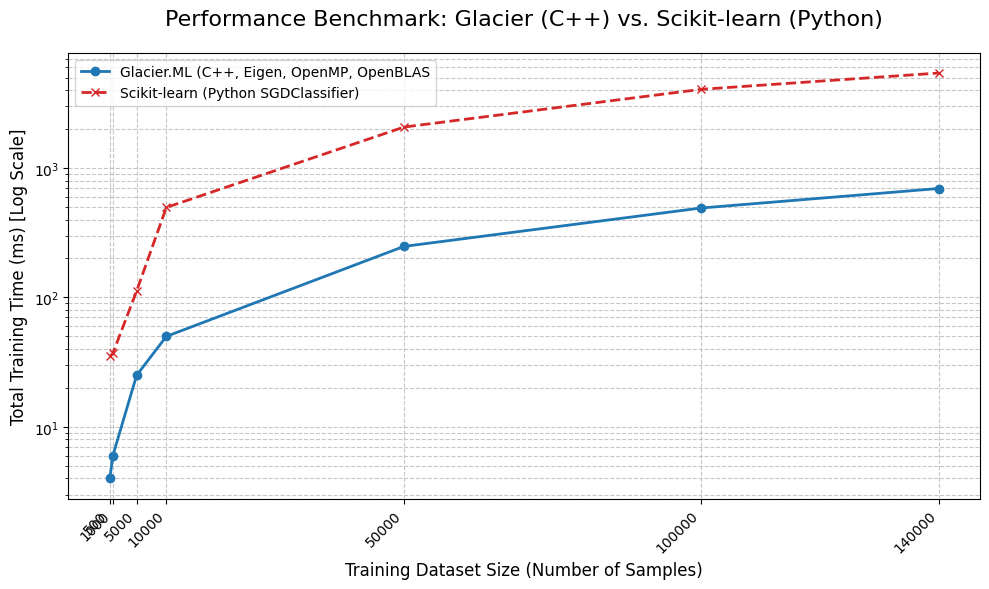

Plot data:
Dataset Sizes: [500, 1000, 5000, 10000, 50000, 100000, 140000]
Glacier Times (ms): [4, 6, 25, 50, 248, 491, 695]
Scikit-learn Times (ms): [35, 37, 112, 496, 2074, 4058, 5423]


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data provided by the user (Time in milliseconds)
glacier_time_stamps = [4, 6, 25, 50, 248, 491, 695]
sklearn_time_stamps = [35, 37, 112, 496, 2074, 4058, 5423]

# Dataset sizes (Matching your C++ benchmark loop)
dataset_sizes = [500, 1000, 5000, 10000, 50000, 100000, 140000]

# --- Plotting ---
plt.figure(figsize=(10, 6))

# Plot Glacier (C++ Implementation)
plt.plot(
    dataset_sizes,
    glacier_time_stamps,
    label='Glacier.ML (C++, Eigen, OpenMP, OpenBLAS',
    marker='o',
    color='tab:blue',
    linewidth=2
)

# Plot Scikit-learn (Python SGDClassifier)
plt.plot(
    dataset_sizes,
    sklearn_time_stamps,
    label='Scikit-learn (Python SGDClassifier, 1 thread)',
    marker='x',
    color='tab:red',
    linestyle='--',
    linewidth=2
)

# Plot Scikit-learn (Python SGDClassifier)
plt.plot(
    dataset_sizes,
    sklearn_time_stamps,
    label='Scikit-learn (Python SGDClassifier, 6 threads)',
    marker='x',
    color='tab:red',
    linestyle='--',
    linewidth=2
)

# --- Customization ---

plt.title('Performance Benchmark: Glacier (C++) vs. Scikit-learn (Python)', fontsize=16, pad=20)
plt.xlabel('Training Dataset Size (Number of Samples)', fontsize=12)
plt.ylabel('Total Training Time (ms) [Log Scale]', fontsize=12)

# Use logarithmic scale on the Y-axis to clearly show the difference across magnitudes
plt.yscale('log')
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.legend(loc='upper left', fontsize=10)

# Set X-axis ticks to match the dataset sizes
plt.xticks(dataset_sizes, rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Plot data:")
print(f"Dataset Sizes: {dataset_sizes}")
print(f"Glacier Times (ms): {glacier_time_stamps}")
print(f"Scikit-learn Times (ms): {sklearn_time_stamps}")